In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns
from scipy import stats

In [8]:
data = pd.read_csv("../data/Gandum.csv")
data

,Id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
1,2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
2,3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
3,4,4141,108.701191,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766960,2.197877,1
4,5,5273,122.747869,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,5083,120.083450,54.821580,0.889709,5179,80.447975,0.534827,286.377,0.778850,2.190441,2
496,497,4432,112.367050,51.294914,0.889726,4550,75.119889,0.601194,270.823,0.759344,2.190608,2
497,498,5020,119.873742,54.718545,0.889740,5104,79.947874,0.528421,285.799,0.772311,2.190733,2
498,499,4035,107.311728,48.930802,0.889996,4150,71.676506,0.584698,258.503,0.758791,2.193132,2


In [9]:
attribute = ["Id","Daerah","SumbuUtama","SumbuKecil","Keunikan","AreaBulatan","Diameter","KadarAir","Keliling","Bulatan","Ransum","Kelas"]

In [10]:
for att in attribute:
    if (att == "Id"):
        continue

    mean = data[att].mean()
    median = data[att].median()
    modus = np.bincount(data[att]).argmax()
    std = data[att].std()
    var = data[att].var()
    minimum = data[att].min()
    maximum = data[att].max()
    rang = maximum-minimum
    quartile = data[att].quantile([.25, .5, .75])
    q75, q25 = np.percentile(data[att], [75 ,25])
    iqr = q75 - q25
    skw = data[att].skew()
    kurt = data[att].kurtosis()

    print("=====================================")
    print("Coulumn :", att)
    print()
    print("Mean :", mean)
    print("Median :", median)
    print("Modus :", modus)
    print("Standar devisiasi :", std)
    print("Variansi :", var)
    print("Range :", rang)
    print("Min :", minimum)
    print("Max :", maximum)
    print("Quartile (25% | 50% | 75%) :", quartile[.25], "|", quartile[.5], "|", quartile[.75])
    print("IQR :", iqr)
    print("Skewness :", skw)
    print("Kurtosis :", kurt)
    print()

Coulumn : Daerah

Mean : 4801.246
Median : 4735.0
Modus : 3992
Standar devisiasi : 986.3954914816018
Variansi : 972976.0656152307
Range : 4931
Min : 2522
Max : 7453
Quartile (25% | 50% | 75%) : 4042.75 | 4735.0 | 5495.5
IQR : 1452.75
Skewness : 0.23814408738280812
Kurtosis : -0.4346305340273977

Coulumn : SumbuUtama

Mean : 116.04517136778003
Median : 115.40513994999999
Modus : 106
Standar devisiasi : 18.28262595755936
Variansi : 334.25441190402336
Range : 153.79546865999998
Min : 74.13311404
Max : 227.9285827
Quartile (25% | 50% | 75%) : 104.11609817499999 | 115.40513994999999 | 129.046792025
IQR : 24.93069385000001
Skewness : 0.7615287378076631
Kurtosis : 4.330533548436968

Coulumn : SumbuKecil

Mean : 53.71524598896002
Median : 53.731198774999996
Modus : 55
Standar devisiasi : 4.071074752475035
Variansi : 16.573649640239662
Range : 29.071182429999993
Min : 39.90651744
Max : 68.97769987
Quartile (25% | 50% | 75%) : 51.1935763325 | 53.731198774999996 | 56.3251579825
IQR : 5.1315816500

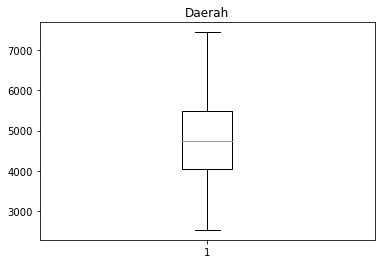

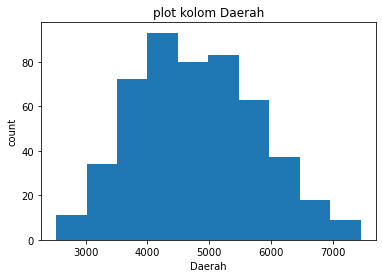

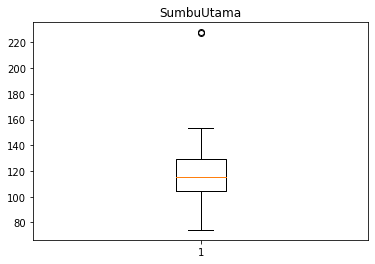

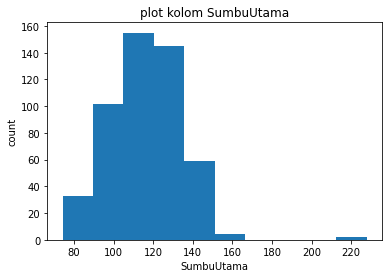

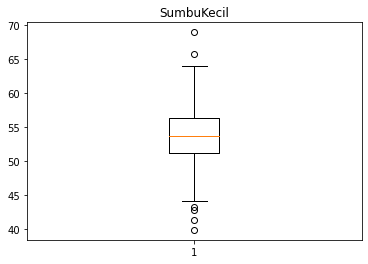

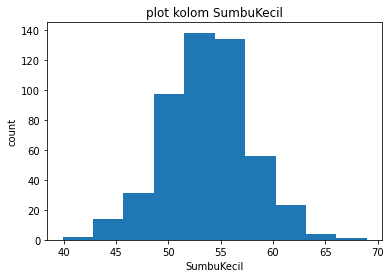

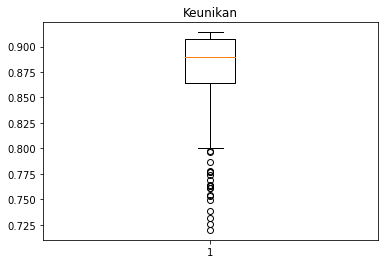

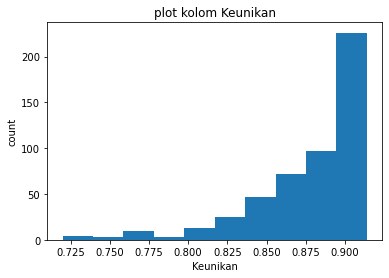

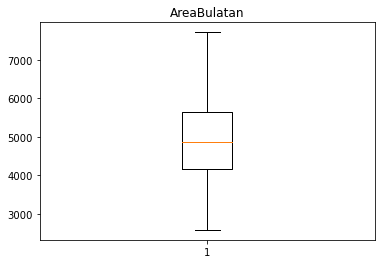

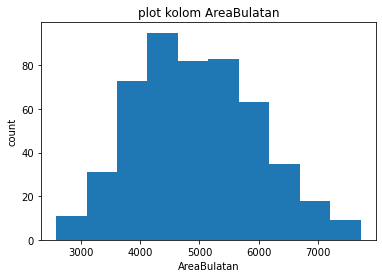

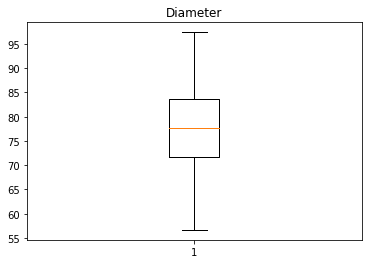

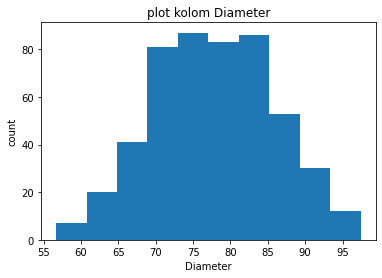

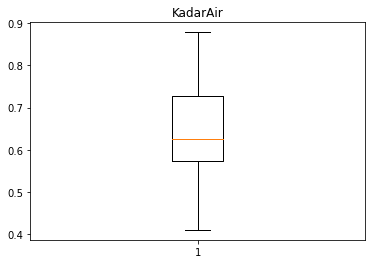

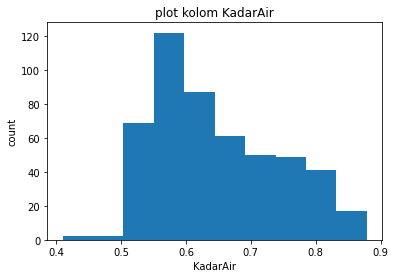

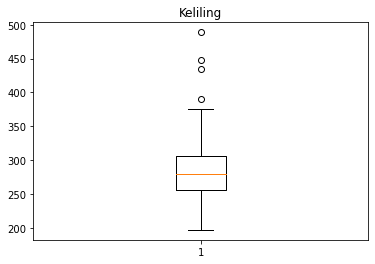

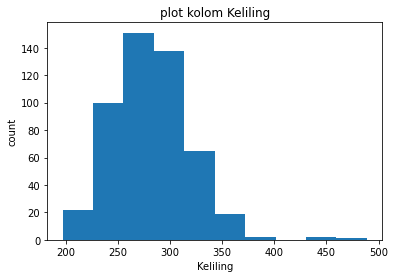

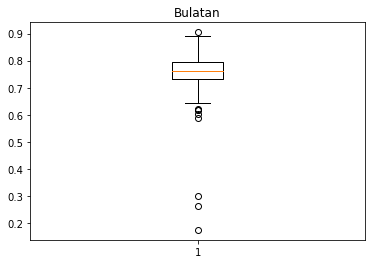

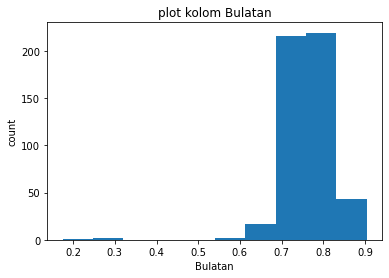

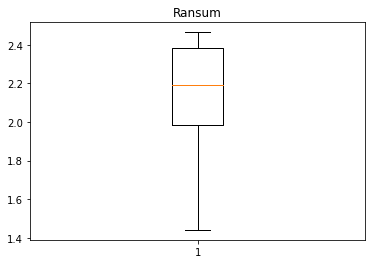

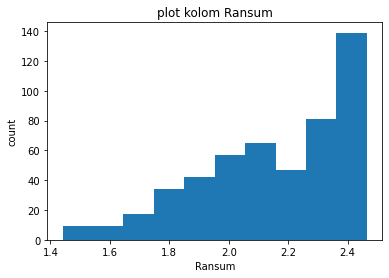

In [11]:
for att in attribute:
    if (att == "Id" or att == "Kelas"):
        continue
        
    x_axis = data[att] # kolom yang dituju
    plt.boxplot(x_axis)
    plt.title(att)
    plt.show()
    
    plt.hist(x_axis)
    plt.title("plot kolom "+ att)
    plt.xlabel(att)
    plt.ylabel("count")
    plt.show()
    



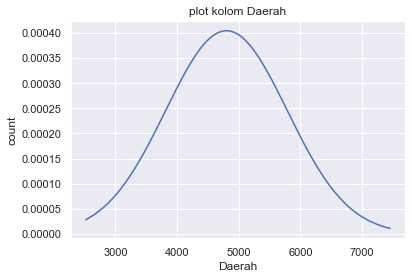

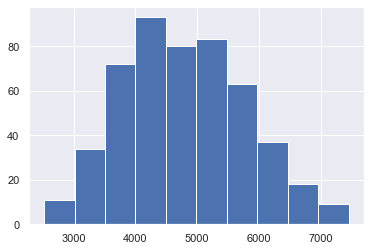

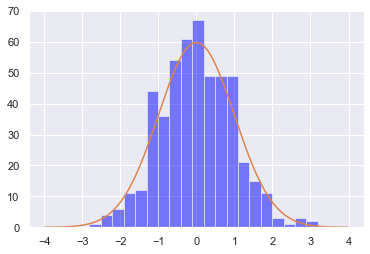

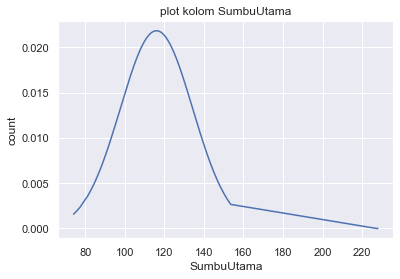

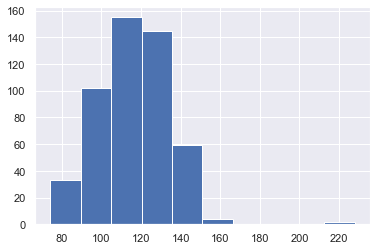

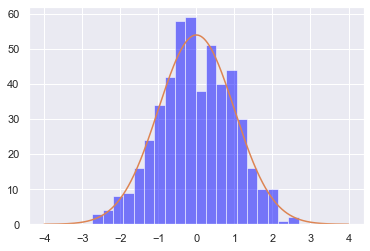

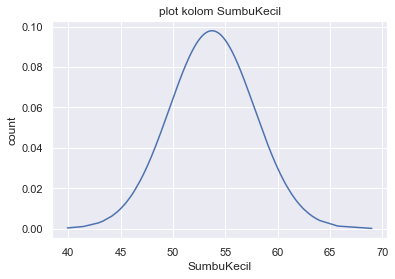

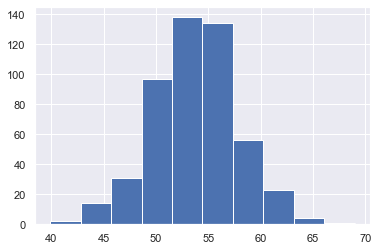

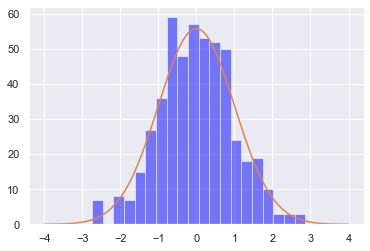

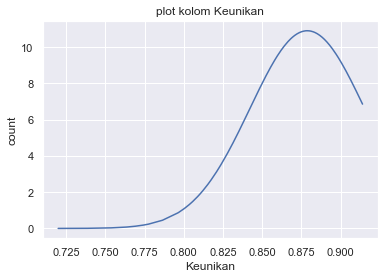

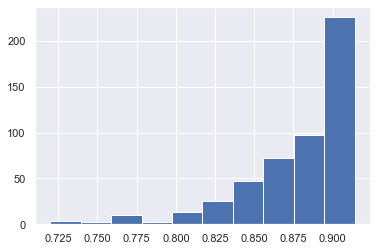

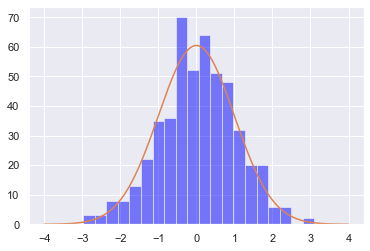

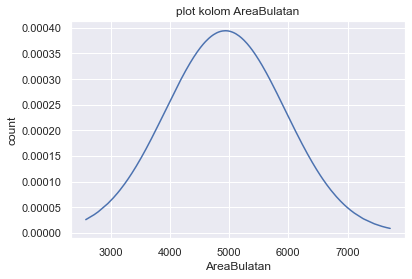

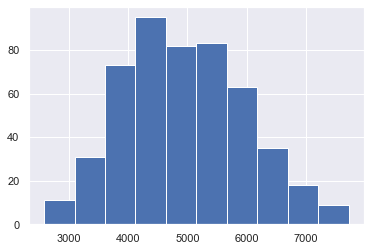

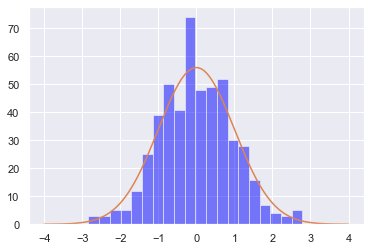

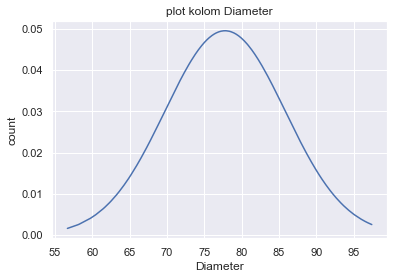

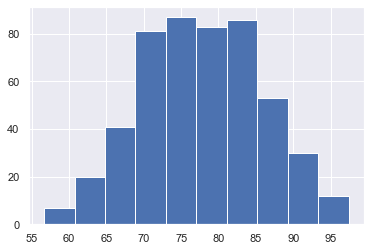

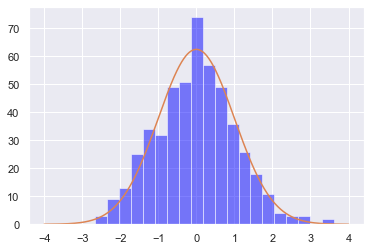

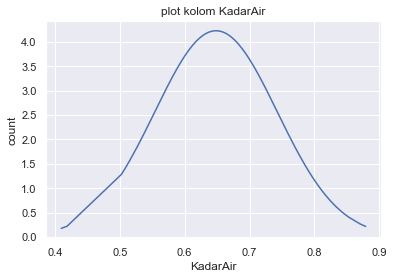

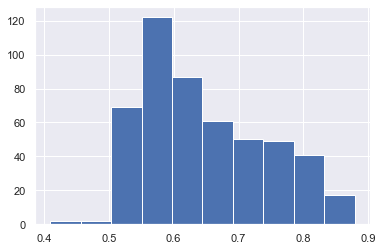

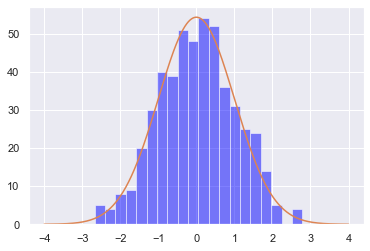

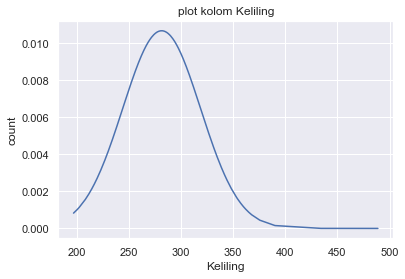

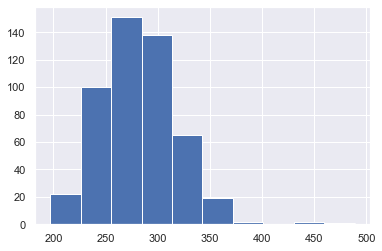

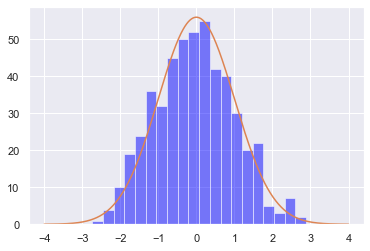

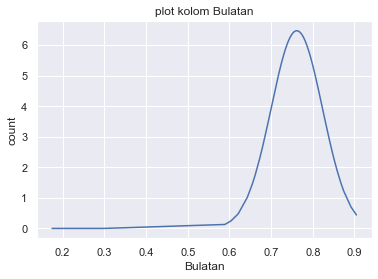

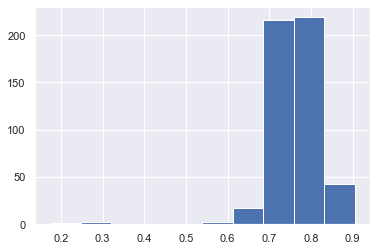

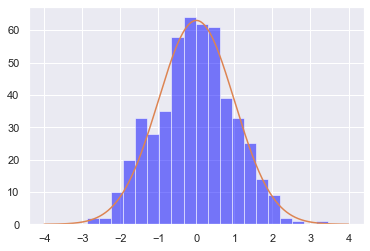

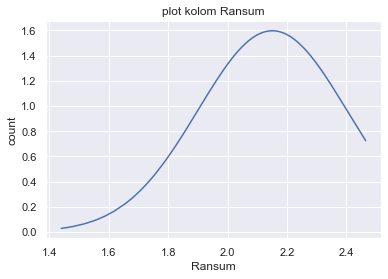

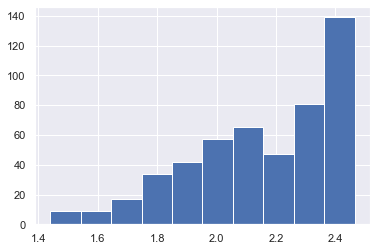

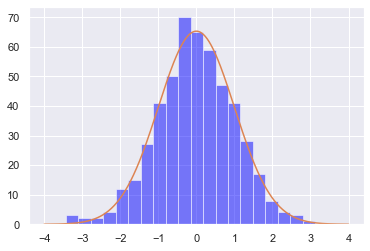

In [22]:
for att in attribute:
    if (att == "Id" or att == "Kelas"):
        continue
        
    x_axis = np.sort(data[att]) # kolom yang dituju
    
    
    mean = statistics.mean(x_axis)
    sd = statistics.stdev(x_axis)
    plt.plot(x_axis, norm.pdf(x_axis, mean, sd))

#     plt.hist(x_axis)
    plt.title("plot kolom "+ att)
    plt.xlabel(att)
    plt.ylabel("count")
    plt.show()
    
    plt.hist(x_axis)
    plt.show()
    
#     dummy
    x = stats.norm.rvs(size=len(x_axis)-1)
    num_bins = 20
    plt.hist(x, bins=num_bins, facecolor='blue', alpha=0.5)

    y = np.linspace(-4, 4, 1000)
    bin_width = (x.max() - x.min()) / num_bins
    plt.plot(y, stats.norm.pdf(y) * (len(x_axis)-1) * bin_width)
    
    plt.show()
    
    

NormaltestResult(statistic=10.858551334227265, pvalue=0.004386271773193838)
NormaltestResult(statistic=95.12010812035354, pvalue=2.2127429343273333e-21)
NormaltestResult(statistic=3.698394471986242, pvalue=0.1573634413290252)
NormaltestResult(statistic=158.61743886606416, pvalue=3.602971140062405e-35)
NormaltestResult(statistic=10.738742339140217, pvalue=0.004657058890055043)
NormaltestResult(statistic=7.446345772505218, pvalue=0.024157198077543095)
NormaltestResult(statistic=48.75592345501653, pvalue=2.5869363404624707e-11)
NormaltestResult(statistic=67.46548246324498, pvalue=2.2390130437166565e-15)
NormaltestResult(statistic=442.11941526532235, pvalue=9.885276103161724e-97)
NormaltestResult(statistic=37.060319894694054, pvalue=8.963008041823752e-09)


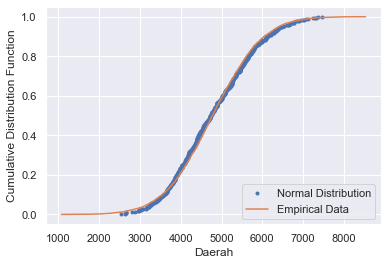

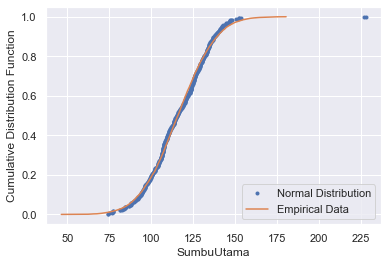

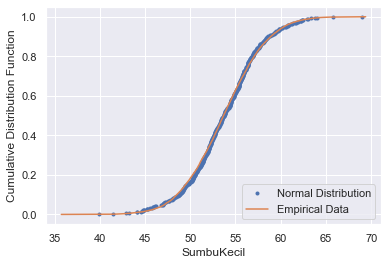

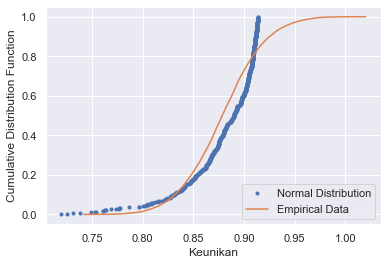

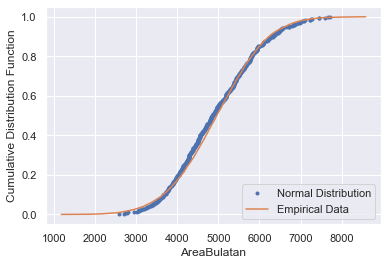

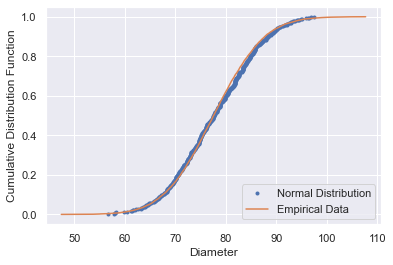

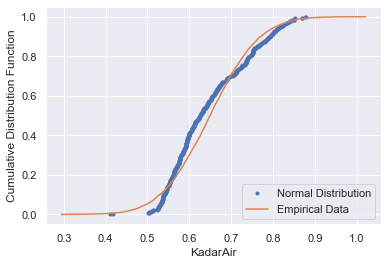

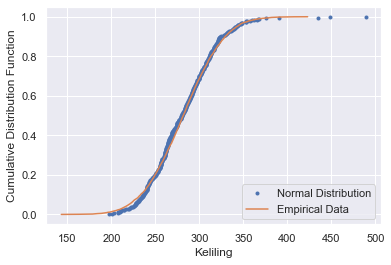

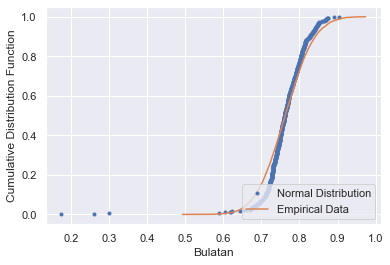

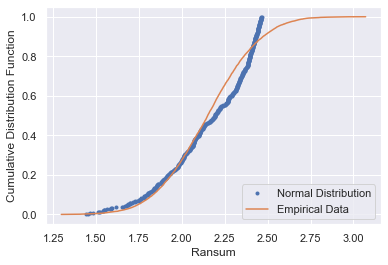

In [26]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y



for att in attribute:
    if (att == "Id" or att == "Kelas"):
        continue
    x, y = ecdf(data[att])

    plt.figure()
    sns.set()
    plt.plot(x, y, marker=".", linestyle="none")
    plt.xlabel(att)
    plt.ylabel("Cumulative Distribution Function")
    
    samples = np.random.normal(np.mean(data[att]), np.std(data[att]), size=10000)
    x_theor, y_theor = ecdf(samples)
    plt.plot(x_theor, y_theor)
    plt.legend(('Normal Distribution', 'Empirical Data'), loc='lower right')
    
    print(stats.normaltest(data[att]))

korelasi antara Daerah dan Kelas
-0.6027466517416654


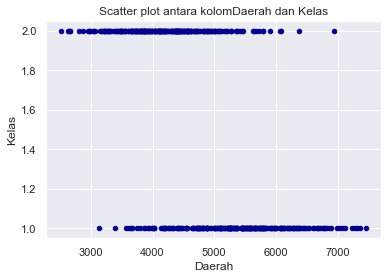

korelasi antara SumbuUtama dan Kelas
-0.7130906104204592


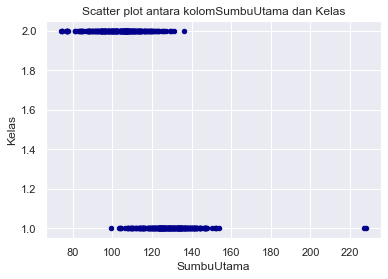

korelasi antara SumbuKecil dan Kelas
-0.15297517335535024


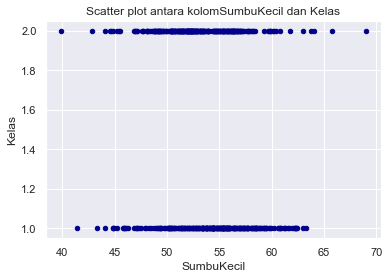

korelasi antara Keunikan dan Kelas
-0.7304563686511927


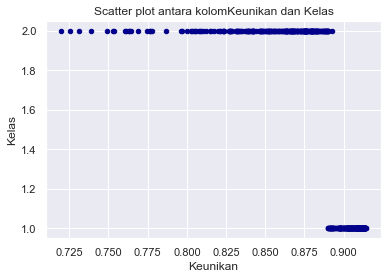

korelasi antara AreaBulatan dan Kelas
-0.6073125434153747


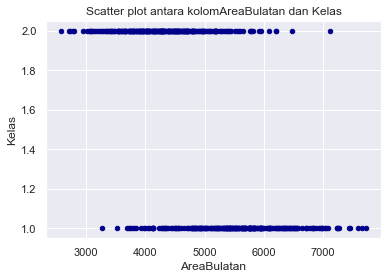

korelasi antara Diameter dan Kelas
-0.6025356896618811


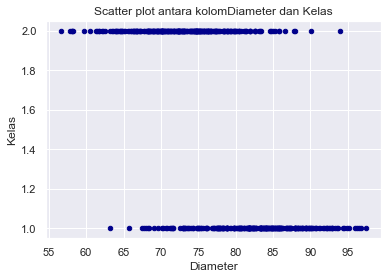

korelasi antara KadarAir dan Kelas
0.13434422605727642


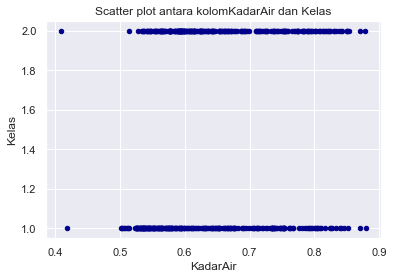

korelasi antara Keliling dan Kelas
-0.6348607454756853


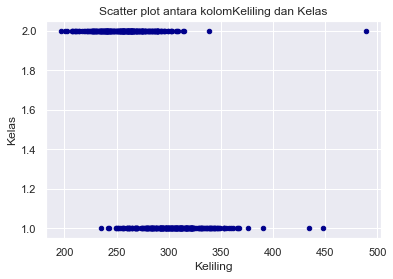

korelasi antara Bulatan dan Kelas
0.5450045317240073


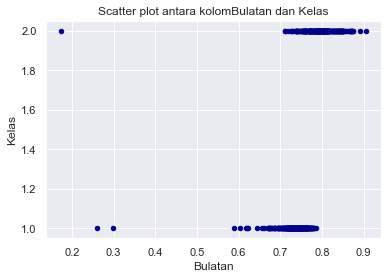

korelasi antara Ransum dan Kelas
-0.8399038681287486


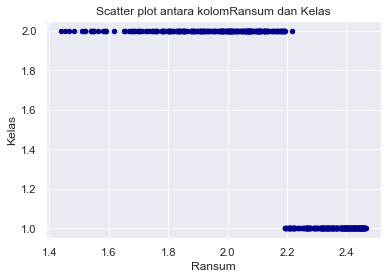

In [24]:
for att in attribute:
    if (att == "Id" or att == "Kelas"):
        continue

    column_1 = data[att]
    column_2 = data["Kelas"]
    correlation = column_1.corr(column_2)
    print("korelasi antara", att, "dan Kelas")
    print(correlation)
    
#     dataFrame = pd.DataFrame(data = data, columns=[att,'Kelas'])
    
    corrTitle = "Scatter plot antara kolom"+ att+ " dan Kelas"
    data.plot.scatter(x=att, y='Kelas', title= corrTitle, color='DarkBlue');
    plt.show();